In [12]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/tienduong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tienduong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tienduong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tienduong/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tienduong/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
import numpy as np
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings

# For multiprocessing
import multiprocess as mp
from itertools import repeat
from datetime import datetime

warnings.filterwarnings('ignore')

### Load the data

In [14]:
df = pd.DataFrame(columns=['content', 'class'])

In [15]:
from bs4 import UnicodeDammit

In [16]:
path = 'Data/bbc/'
for directory in os.listdir(path):
    directory = os.path.join(path, directory)
    if os.path.isdir(directory):
        for filename in os.listdir(directory):
            filename = os.path.join(directory, filename)
            encoding = ''
            with open(filename, 'rb') as f:
                content = f.read()
                suggestion = UnicodeDammit(content)
                encoding = suggestion.original_encoding

            with open(filename, encoding=encoding) as f:
                content = f.read()
                current_df = pd.DataFrame({'content': [content], 'class': [os.path.basename(directory)]})
                df = df.append(current_df, ignore_index=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2225 non-null   object
 1   class    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [18]:
# Check missing data
df.isnull().sum()

content    0
class      0
dtype: int64

In [19]:
# Check duplicates
df.duplicated().sum()

98

In [20]:
# Drop duplicates and check again
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [21]:
# Print some rows
df.head()

content          class
0  Musicians to tackle US red tape\n\nMusicians' ...  entertainment
1  U2's desire to be number one\n\nU2, who have w...  entertainment
2  Rocker Doherty in on-stage fight\n\nRock singe...  entertainment
3  Snicket tops US box office chart\n\nThe film a...  entertainment
4  Ocean's Twelve raids box office\n\nOcean's Twe...  entertainment

In [22]:
df.tail()

content class
2220  Warning over Windows Word files\n\nWriting a M...  tech
2221  Fast lifts rise into record books\n\nTwo high-...  tech
2222  Nintendo adds media playing to DS\n\nNintendo ...  tech
2223  Fast moving phone viruses appear\n\nSecurity f...  tech
2224  Hacker threat to Apple's iTunes\n\nUsers of Ap...  tech

### Clean the text

In [29]:
import dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

In [30]:
cluster = LocalCluster()
client = Client(cluster)
dask.config.set(scheduler='multiprocessing')

In [26]:
from myhelpers import text_cleaner

In [31]:
df_dask = dd.from_pandas(df, npartitions=16)
df_dask = df_dask.map_partitions(text_cleaner.simple_text_clean)

In [33]:
# Convert to pandas
with ProgressBar():
    df = df_dask.compute(num_workers=8)

# Free memory
del df_dask

[########################################] | 100% Completed | 31.1s


In [34]:
# Print some rows
df.head()

content          class
0  musician tackle u red tape musician group tack...  entertainment
1  desire number one three prestigious grammy awa...  entertainment
2  rocker doherty stage fight rock singer pete do...  entertainment
3  snicket top u box office chart film adaptation...  entertainment
4  ocean twelve raid box office ocean twelve crim...  entertainment

### Use Count Vectorizer

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
# Create the transform
vectorizer = CountVectorizer(max_features=5000)

In [37]:
# Fit the data
vectorizer.fit(df['content'])

CountVectorizer(max_features=5000)

In [38]:
# Transform the data
X = vectorizer.transform(df['content'])

In [39]:
df_new = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [40]:
# Let pandas display precision of 2 decimals
pd.options.display.float_format = '{:,.2f}'.format

In [41]:
df_new.head(20)

aaa  aaas  abandon  abba  abbas  abbott  abc  abide  ability  able  ...  \
0     0     0        0     0      0       0    0      0        1     0  ...   
1     0     0        0     0      0       0    0      0        1     0  ...   
2     0     0        0     0      0       0    0      0        0     0  ...   
3     0     0        0     0      0       0    0      0        0     0  ...   
4     0     0        0     0      0       0    0      0        0     0  ...   
5     0     0        0     0      0       0    1      0        1     0  ...   
6     0     0        0     0      0       0    0      0        0     1  ...   
7     0     0        0     0      0       0    0      0        0     0  ...   
8     0     0        0     0      0       0    0      0        0     0  ...   
9     0     0        0     0      0       0    0      0        0     0  ...   
10    0     0        0     0      0       0    0      0        0     0  ...   
11    0     0        0     0      0       0    0      0        0     0  ...   
12    0     0        0     0      0       0    0      0        0     0  ...   
13    0     0        0     0      0       0    0      0        0     0  ...   
14    0     0        0     0      0       0    0      0        0     0  ...   
15    0     0        0     0      0       0    4      0        0     0  ...   
16    0     0        0     0      0       0    0      0        0     0  ...   
17    0     0        0     0      0       0    0      0        0     0  ...   
18    0     0        0     0      0       0    0      0        0     0  ...   
19    0     0        0     0      0       0    0      0        0     0  ...   

    yuan  yugansk  yuganskneftegas  yukos  yushchenko  zealand  zero  zombie  \
0      0        0                0      0           0        0     0       0   
1      0        0                0      0           0        0     0       0   
2      0        0                0      0           0        0     0       0   
3      0        0                0      0           0        0     0       0   
4      0        0                0      0           0        0     0       0   
5      0        0                0      0           0        0     0       0   
6      0        0                0      0           0        0     0       0   
7      0        0                0      0           0        0     0       0   
8      0        0                0      0           0        0     0       0   
9      0        0                0      0           0        0     0       0   
10     0        0                0      0           0        0     0       0   
11     0        0                0      0           0        0     0       0   
12     0        0                0      0           0        0     0       0   
13     0        0                0      0           0        0     0       0   
14     0        0                0      0           0        0     0       0   
15     0        0                0      0           0        0     0       0   
16     0        0                0      0           0        0     0       0   
17     0        0                0      0           0        0     0       1   
18     0        0                0      0           0        0     0       0   
19     0        0                0      0           0        0     0       0   

    zone  zurich  
0      0       0  
1      0       0  
2      0       0  
3      0       0  
4      0       0  
5      0       0  
6      0       0  
7      0       0  
8      0       0  
9      0       0  
10     0       0  
11     0       0  
12     0       0  
13     0       0  
14     0       0  
15     0       0  
16     0       0  
17     0       0  
18     0       0  
19     0       0  

[20 rows x 5000 columns]

In [42]:
df_new.shape

(2127, 5000)

In [43]:
class_dictionary = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

In [44]:
y = df['class'].map(class_dictionary)

In [45]:
y.head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: class, dtype: int64

### Use Naive Bayes Classifier

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42)

In [31]:
clf = MultinomialNB()

In [32]:
clf.fit(X_train, y_train)

MultinomialNB()

In [33]:
print('Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.97


In [34]:
from sklearn.metrics import classification_report

In [35]:
y_pred = clf.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.97      0.97      0.97        74
           2       0.95      0.99      0.97        80
           3       1.00      1.00      1.00        91
           4       0.95      0.97      0.96        73

    accuracy                           0.97       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.97      0.97      0.97       426



In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test, y_pred)

array([[101,   0,   3,   0,   4],
       [  1,  72,   1,   0,   0],
       [  0,   1,  79,   0,   0],
       [  0,   0,   0,  91,   0],
       [  1,   1,   0,   0,  71]])

In [39]:
import seaborn as sns

In [40]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

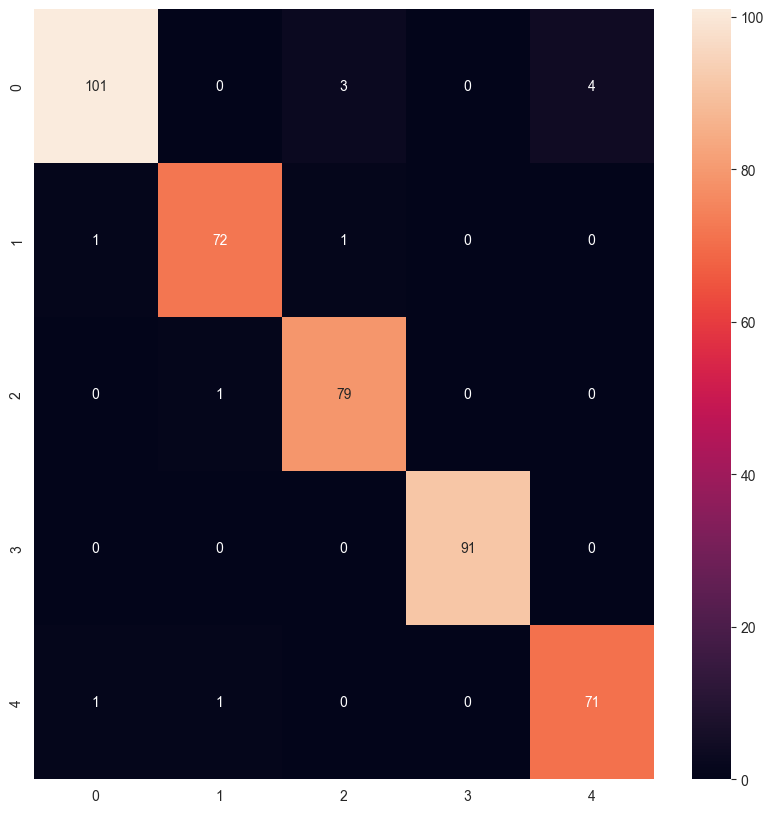

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')

### Use TF-IDF Vectorizer

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Create the transform
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.02)

In [44]:
# Fit the data
vectorizer.fit(df['content'])

TfidfVectorizer(min_df=0.02, ngram_range=(1, 2))

In [45]:
# Transform the data
X = vectorizer.transform(df['content'])

In [46]:
df_new = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [47]:
# Let pandas display precision of 4 decimals
pd.options.display.float_format = '{:,.4f}'.format

In [48]:
df_new.head(20)

ability   able  absolutely  abuse  academy  accept  access  accord  \
0    0.0838 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
1    0.0449 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0316   
2    0.0000 0.0000      0.0000 0.0000   0.0901  0.0000  0.0000  0.0000   
3    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
4    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0674   
5    0.0793 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
6    0.0000 0.0793      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
7    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0474   
8    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
9    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
10   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
11   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0333   
12   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
13   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
14   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
15   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
16   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
17   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
18   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
19   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   

    account  accuse  ...  write  writer  wrong   year  year ago  year old  \
0    0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0286    0.0000    0.0000   
1    0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0460    0.0000    0.0000   
2    0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0000    0.0000    0.0000   
3    0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0000    0.0000    0.0000   
4    0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0000    0.0000    0.0000   
5    0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0000    0.0000    0.0000   
6    0.0000  0.0923  ... 0.0000  0.0000 0.0000 0.0000    0.0000    0.0000   
7    0.0000  0.0000  ... 0.0546  0.0000 0.0000 0.1608    0.0000    0.0000   
8    0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.1407    0.0000    0.0000   
9    0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0622    0.0000    0.0000   
10   0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0351    0.0000    0.0745   
11   0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0646    0.0000    0.0000   
12   0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.1066    0.0000    0.0754   
13   0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0000    0.0000    0.0000   
14   0.0000  0.0000  ... 0.0522  0.0000 0.0000 0.0658    0.0000    0.0000   
15   0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0891    0.0787    0.0630   
16   0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0000    0.0000    0.0000   
17   0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0776    0.0514    0.0000   
18   0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0339    0.0000    0.0359   
19   0.0000  0.0000  ... 0.0000  0.0000 0.0000 0.0335    0.0000    0.0000   

    year say    yet   york  young  
0     0.0000 0.0000 0.0000 0.0000  
1     0.0000 0.0000 0.0000 0.0000  
2     0.0000 0.0000 0.0000 0.0000  
3     0.0000 0.0000 0.0000 0.0000  
4     0.0000 0.0000 0.0890 0.0000  
5     0.0000 0.0000 0.0000 0.0000  
6     0.0000 0.0000 0.0000 0.0000  
7     0.0000 0.0000 0.0000 0.0000  
8     0.0000 0.0000 0.0959 0.0000  
9     0.0000 0.0000 0.0000 0.1012  
10    0.0000 0.0806 0.0000 0.0000  
11    0.0000 0.0000 0.0000 0.0000  
12    0.0000 0.0816 0.0968 0.0000  
13    0.0000 0.0000 0.0000 0.0000  
14    0.0000 0.0000 0.0000 0.0000  
15    0.0000 0.0000 0.0000 0.0000  
16    0.0000 0.0561 0.0000 0.0000  
17    0.0000 0.0000 0.0000 0.0000  
18    0.0000 0.0389 0.0000 0.1241  
19    0.0000 0.0000 0.0000 0.0000  

[20 rows x 1510 columns]

In [49]:
df_new.shape

(2127, 1510)

### Use KMeans Clustering

In [46]:
from sklearn.cluster import KMeans

In [47]:
MIN_K = 2
MAX_K = 9
K = range(MIN_K, MAX_K + 1)

In [48]:
# Define a function to calculate the inertia for each value of K
def kmean_test(df, k):
    from sklearn.cluster import KMeans
    from sklearn import metrics

    kmeanModel = KMeans(n_clusters=k, n_init=20, max_iter=1000, random_state=42)
    kmeanModel.fit(df)

    return (kmeanModel.inertia_,
            metrics.silhouette_score(df, kmeanModel.labels_, metric='euclidean'),
            kmeanModel)

In [49]:
start_time = datetime.now()
a_pool = mp.Pool(processes = (MAX_K - MIN_K + 1))
results = a_pool.starmap(kmean_test, zip(repeat(df_new), K))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
a_pool.close()

Duration: 0:00:50.762760


In [50]:
kmeans_distortions = []
kmeans_silhouettes = {}
kmean_models = {}
for ret in results:
    kmeans_distortions.append(ret[0])
    kmeans_silhouettes[ret[2].n_clusters] = ret[1]
    kmean_models[ret[2].n_clusters] = ret[2]

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

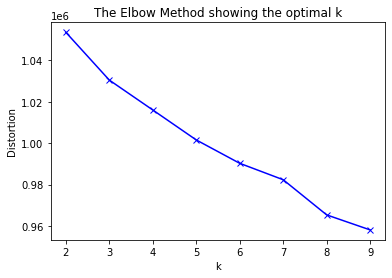

In [51]:
# Plot the elbow curve
plt.plot(K, kmeans_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

Text(0, 0.5, 'Silhouette score')

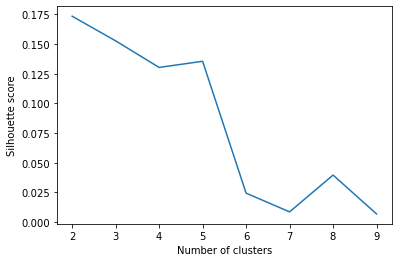

In [52]:
# Plot the silhouette graph
plt.plot(K, kmeans_silhouettes.values())
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [53]:
from myhelpers import silhouette_plot

For n_clusters = 2 The average silhouette_score is : 0.17339472889743449
For n_clusters = 3 The average silhouette_score is : 0.15265966055233657
For n_clusters = 4 The average silhouette_score is : 0.1302699931803228
For n_clusters = 5 The average silhouette_score is : 0.13546731957245609
For n_clusters = 6 The average silhouette_score is : 0.024391518316730133
For n_clusters = 7 The average silhouette_score is : 0.008605470155849275
For n_clusters = 8 The average silhouette_score is : 0.03959765661869174
For n_clusters = 9 The average silhouette_score is : 0.006891795078008631


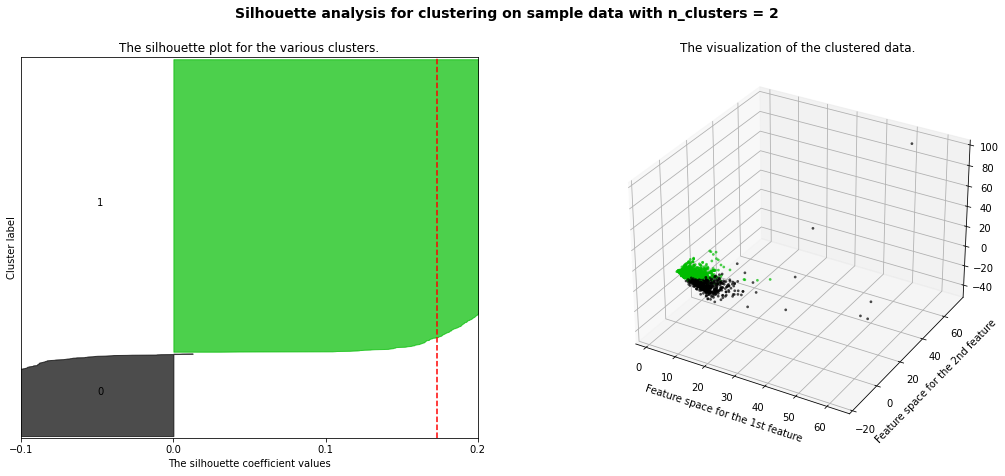

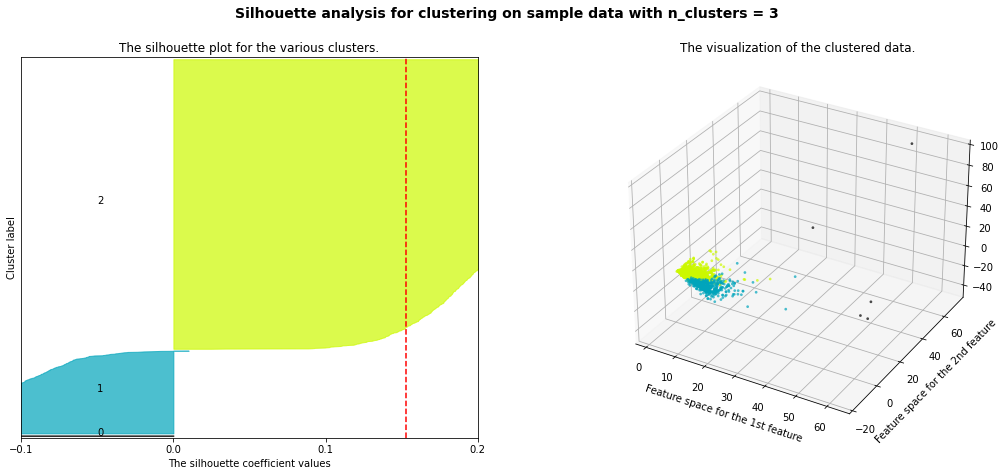

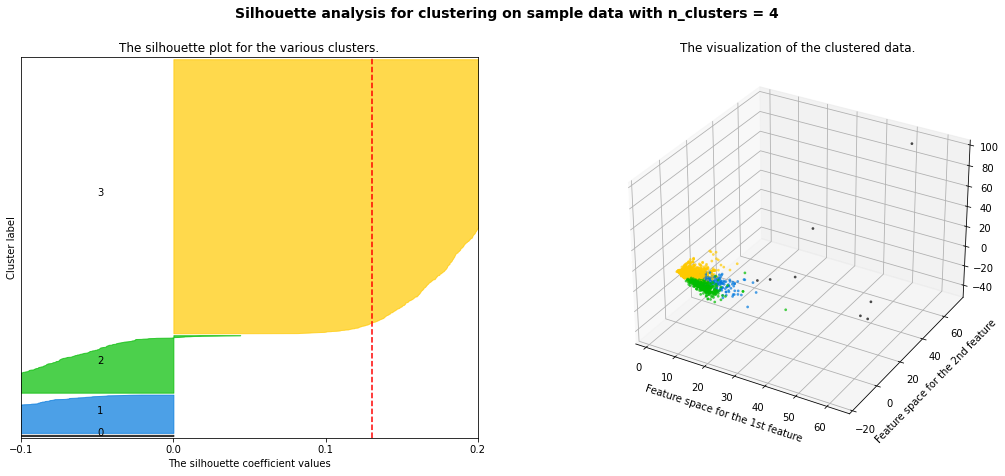

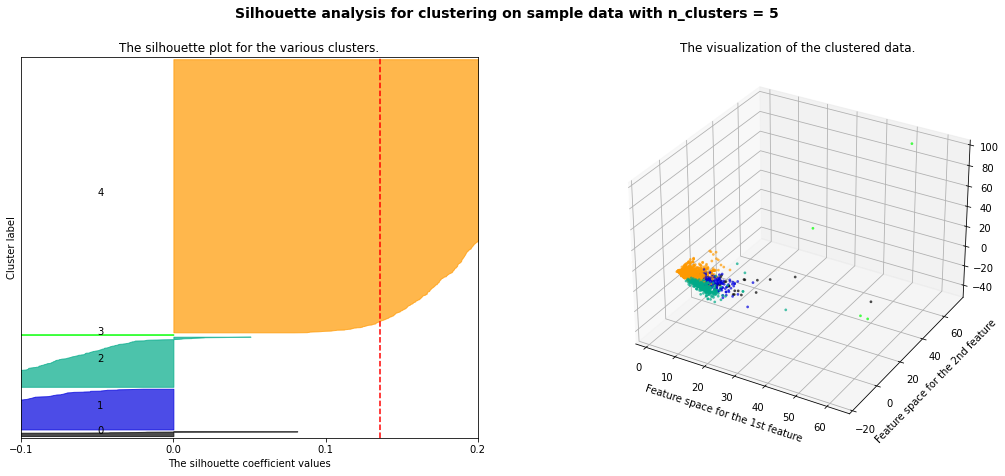

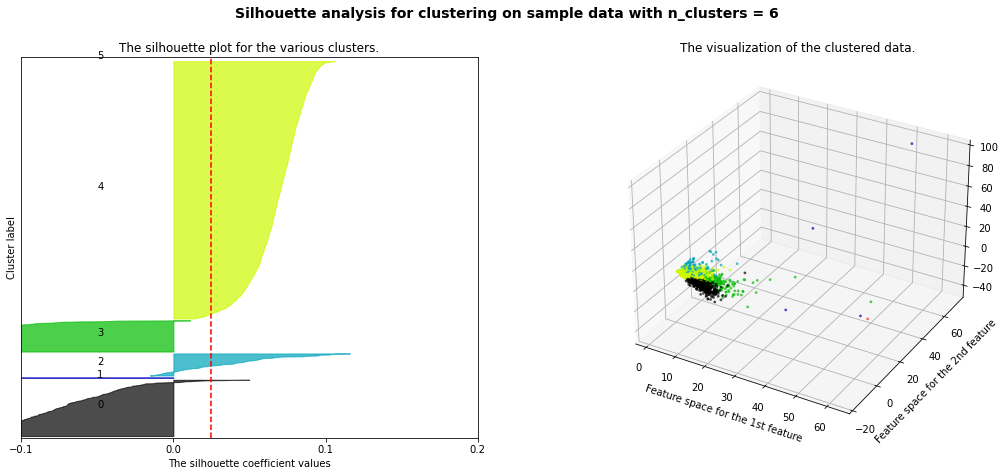

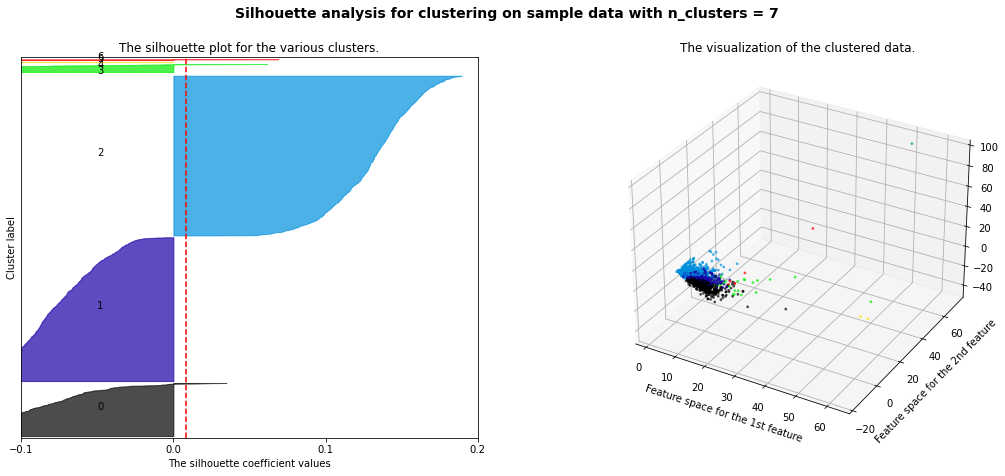

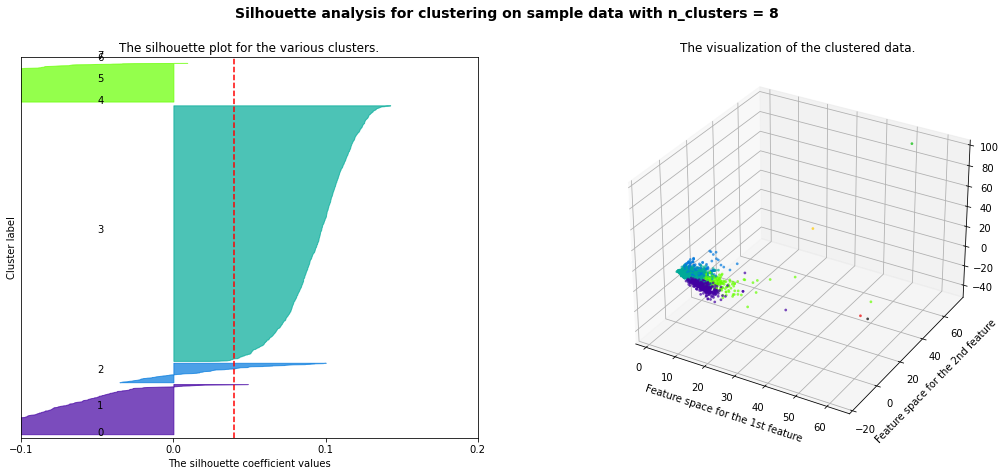

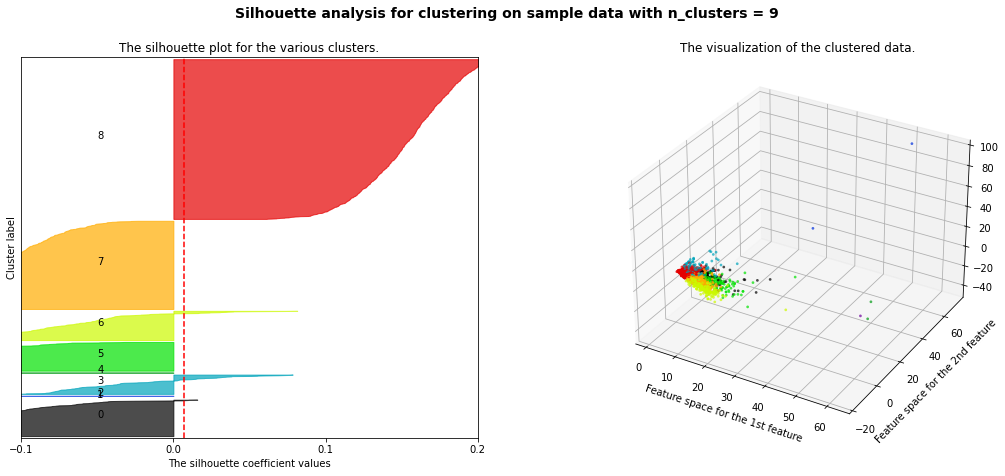

In [54]:
silhouette_plot.silhouette_plot(MAX_K, df_new, kmean_models, kmeans_silhouettes)

### Use KMeans Clustering with K=5

In [55]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [56]:
kmeans.fit(df_new)

KMeans(n_clusters=5, random_state=42)

In [57]:
df_kmeans = df_new.copy()
df_kmeans['cluster_'] = kmeans.labels_

In [58]:
df_kmeans.head(20)

aaa  aaas  abandon  abba  abbas  abbott  abc  abide  ability  able  ...  \
0     0     0        0     0      0       0    0      0        1     0  ...   
1     0     0        0     0      0       0    0      0        1     0  ...   
2     0     0        0     0      0       0    0      0        0     0  ...   
3     0     0        0     0      0       0    0      0        0     0  ...   
4     0     0        0     0      0       0    0      0        0     0  ...   
5     0     0        0     0      0       0    1      0        1     0  ...   
6     0     0        0     0      0       0    0      0        0     1  ...   
7     0     0        0     0      0       0    0      0        0     0  ...   
8     0     0        0     0      0       0    0      0        0     0  ...   
9     0     0        0     0      0       0    0      0        0     0  ...   
10    0     0        0     0      0       0    0      0        0     0  ...   
11    0     0        0     0      0       0    0      0        0     0  ...   
12    0     0        0     0      0       0    0      0        0     0  ...   
13    0     0        0     0      0       0    0      0        0     0  ...   
14    0     0        0     0      0       0    0      0        0     0  ...   
15    0     0        0     0      0       0    4      0        0     0  ...   
16    0     0        0     0      0       0    0      0        0     0  ...   
17    0     0        0     0      0       0    0      0        0     0  ...   
18    0     0        0     0      0       0    0      0        0     0  ...   
19    0     0        0     0      0       0    0      0        0     0  ...   

    yugansk  yuganskneftegas  yukos  yushchenko  zealand  zero  zombie  zone  \
0         0                0      0           0        0     0       0     0   
1         0                0      0           0        0     0       0     0   
2         0                0      0           0        0     0       0     0   
3         0                0      0           0        0     0       0     0   
4         0                0      0           0        0     0       0     0   
5         0                0      0           0        0     0       0     0   
6         0                0      0           0        0     0       0     0   
7         0                0      0           0        0     0       0     0   
8         0                0      0           0        0     0       0     0   
9         0                0      0           0        0     0       0     0   
10        0                0      0           0        0     0       0     0   
11        0                0      0           0        0     0       0     0   
12        0                0      0           0        0     0       0     0   
13        0                0      0           0        0     0       0     0   
14        0                0      0           0        0     0       0     0   
15        0                0      0           0        0     0       0     0   
16        0                0      0           0        0     0       0     0   
17        0                0      0           0        0     0       1     0   
18        0                0      0           0        0     0       0     0   
19        0                0      0           0        0     0       0     0   

    zurich  cluster_  
0        0         0  
1        0         2  
2        0         2  
3        0         2  
4        0         2  
5        0         2  
6        0         0  
7        0         2  
8        0         2  
9        0         2  
10       0         2  
11       0         2  
12       0         2  
13       0         2  
14       0         2  
15       0         0  
16       0         2  
17       0         2  
18       0         2  
19       0         2  

[20 rows x 5001 columns]

In [59]:
### Word Cloud for each cluster

In [71]:
from wordcloud import WordCloud

In [72]:
# Create a list of words for each cluster
cluster_0 = df_kmeans[df_kmeans['cluster_'] == 0].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_1 = df_kmeans[df_kmeans['cluster_'] == 1].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_2 = df_kmeans[df_kmeans['cluster_'] == 2].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_3 = df_kmeans[df_kmeans['cluster_'] == 3].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_4 = df_kmeans[df_kmeans['cluster_'] == 4].drop('cluster_', axis=1).sum().sort_values(ascending=False)

In [73]:
# Create a word cloud for each cluster
wordcloud_0 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_0)
wordcloud_1 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_1)
wordcloud_2 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_2)
wordcloud_3 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_3)
wordcloud_4 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_4)

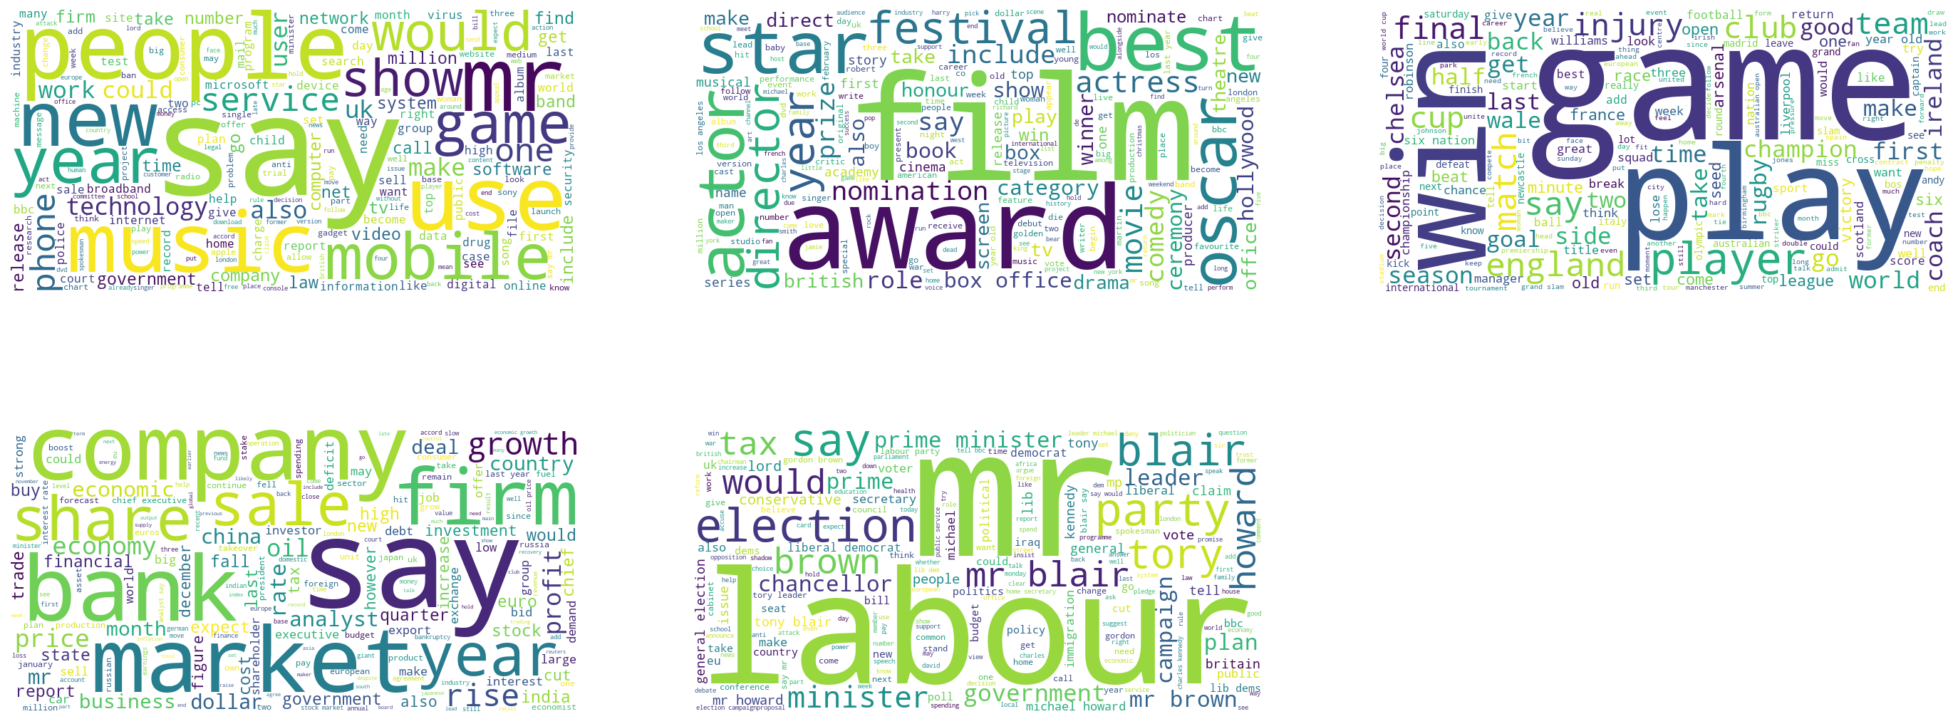

In [74]:
# Plot the word cloud
plt.figure(figsize=(25, 10))
plt.subplot(231)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.subplot(232)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.subplot(233)
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.subplot(234)
plt.imshow(wordcloud_3, interpolation='bilinear')
plt.axis('off')
plt.subplot(235)
plt.imshow(wordcloud_4, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Nhận xét:
....

### AgglomerativeClustering

In [75]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

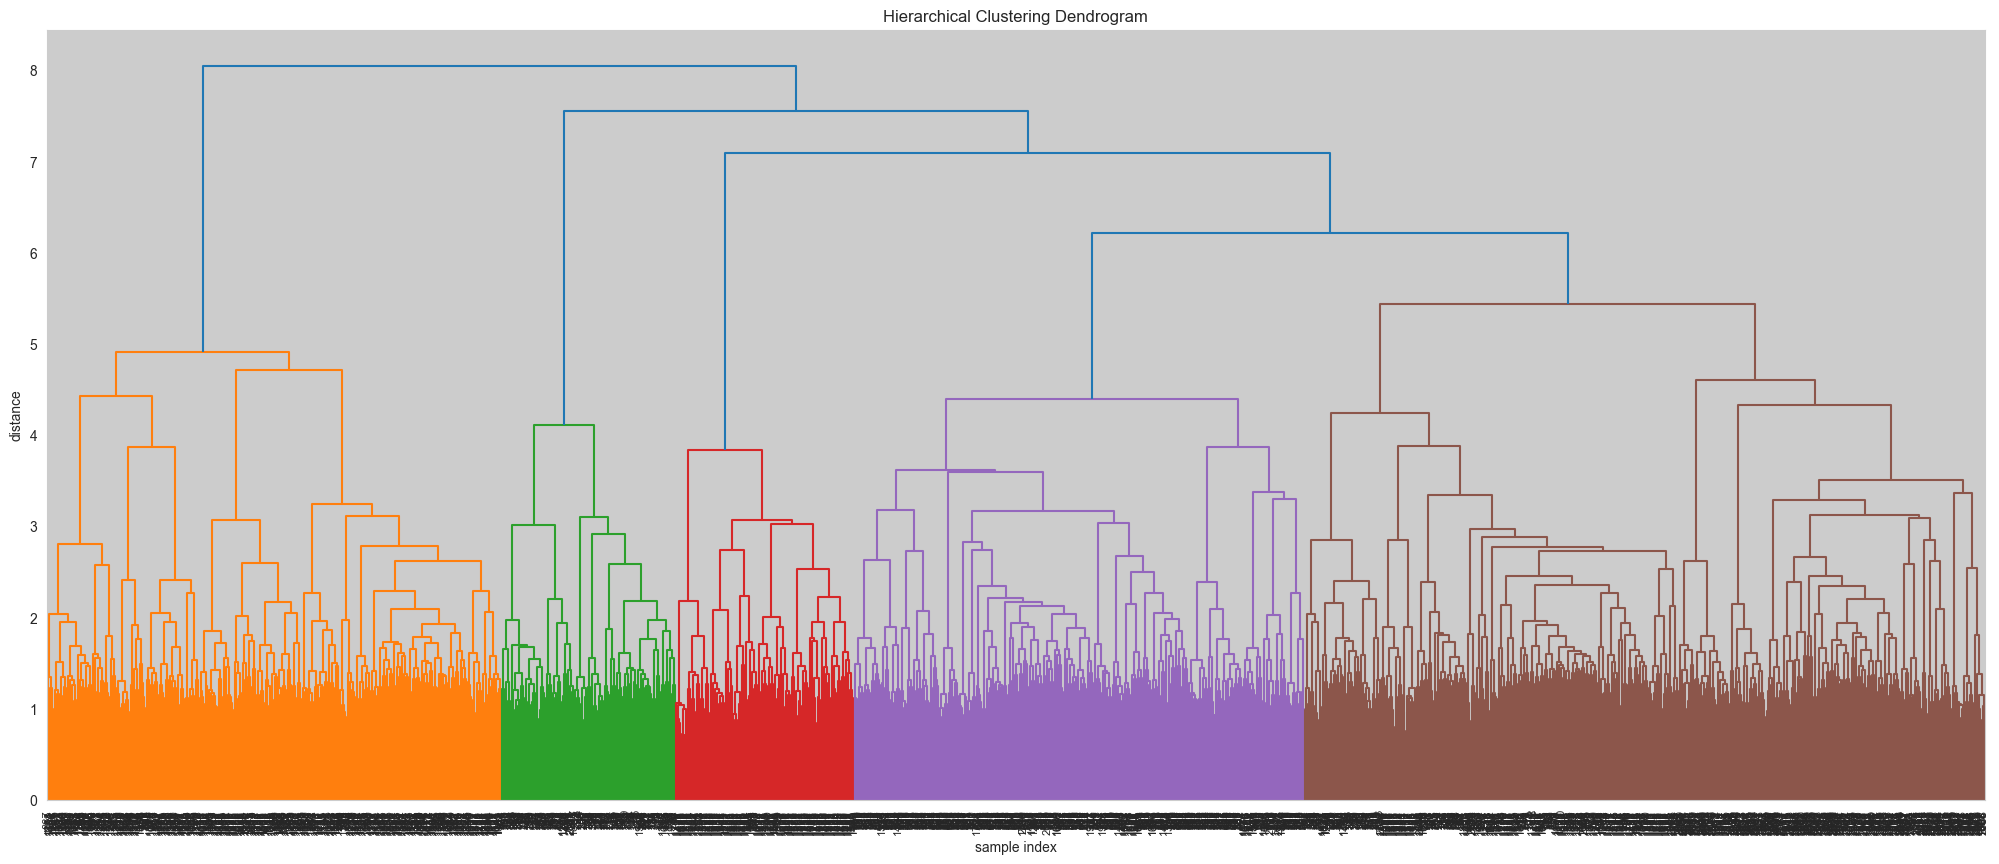

In [76]:
# Draw a dendrogram
Z = linkage(df_new, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [77]:
# Use AgglomerativeClustering with n_clusters=5

In [78]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [79]:
labels = cluster.fit_predict(df_new)

In [80]:
df_agg = df_new.copy()
df_agg['cluster_'] = labels

In [81]:
df_agg.head(20)

ability   able  absolutely  abuse  academy  accept  access  accord  \
0    0.0838 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
1    0.0449 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0316   
2    0.0000 0.0000      0.0000 0.0000   0.0901  0.0000  0.0000  0.0000   
3    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
4    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0674   
5    0.0793 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
6    0.0000 0.0793      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
7    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0474   
8    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
9    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
10   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
11   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0333   
12   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
13   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
14   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
15   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
16   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
17   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
18   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
19   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   

    account  accuse  ...  writer  wrong   year  year ago  year old  year say  \
0    0.0000  0.0000  ...  0.0000 0.0000 0.0286    0.0000    0.0000    0.0000   
1    0.0000  0.0000  ...  0.0000 0.0000 0.0460    0.0000    0.0000    0.0000   
2    0.0000  0.0000  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
3    0.0000  0.0000  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
4    0.0000  0.0000  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
5    0.0000  0.0000  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
6    0.0000  0.0923  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
7    0.0000  0.0000  ...  0.0000 0.0000 0.1608    0.0000    0.0000    0.0000   
8    0.0000  0.0000  ...  0.0000 0.0000 0.1407    0.0000    0.0000    0.0000   
9    0.0000  0.0000  ...  0.0000 0.0000 0.0622    0.0000    0.0000    0.0000   
10   0.0000  0.0000  ...  0.0000 0.0000 0.0351    0.0000    0.0745    0.0000   
11   0.0000  0.0000  ...  0.0000 0.0000 0.0646    0.0000    0.0000    0.0000   
12   0.0000  0.0000  ...  0.0000 0.0000 0.1066    0.0000    0.0754    0.0000   
13   0.0000  0.0000  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
14   0.0000  0.0000  ...  0.0000 0.0000 0.0658    0.0000    0.0000    0.0000   
15   0.0000  0.0000  ...  0.0000 0.0000 0.0891    0.0787    0.0630    0.0000   
16   0.0000  0.0000  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
17   0.0000  0.0000  ...  0.0000 0.0000 0.0776    0.0514    0.0000    0.0000   
18   0.0000  0.0000  ...  0.0000 0.0000 0.0339    0.0000    0.0359    0.0000   
19   0.0000  0.0000  ...  0.0000 0.0000 0.0335    0.0000    0.0000    0.0000   

      yet   york  young  cluster_  
0  0.0000 0.0000 0.0000         0  
1  0.0000 0.0000 0.0000         0  
2  0.0000 0.0000 0.0000         0  
3  0.0000 0.0000 0.0000         2  
4  0.0000 0.0890 0.0000         2  
5  0.0000 0.0000 0.0000         2  
6  0.0000 0.0000 0.0000         0  
7  0.0000 0.0000 0.0000         2  
8  0.0000 0.0959 0.0000         0  
9  0.0000 0.0000 0.1012         2  
10 0.0806 0.0000 0.0000         2  
11 0.0000 0.0000 0.0000         2  
12 0.0816 0.0968 0.0000         0  
13 0.0000 0.0000 0.0000         0  
14 0.0000 0.0000 0.0000         2  
15 0.0000 0.0000 0.0000         0  
16 0.0561 0.0000 0.0000         2  
17 0.0000 0.0000 0.0000         2  
18 0.0389 0.0000 0.1241         2  
19 0.0000 0.0000 0.0000         2  

[20 rows x 

In [82]:
# Create a list of words for each cluster
cluster_0 = df_agg[df_agg['cluster_'] == 0].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_1 = df_agg[df_agg['cluster_'] == 1].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_2 = df_agg[df_agg['cluster_'] == 2].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_3 = df_agg[df_agg['cluster_'] == 3].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_4 = df_agg[df_agg['cluster_'] == 4].drop('cluster_', axis=1).sum().sort_values(ascending=False)

In [83]:
# Create a word cloud for each cluster
wordcloud_0 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_0)
wordcloud_1 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_1)
wordcloud_2 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_2)
wordcloud_3 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_3)
wordcloud_4 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_4)

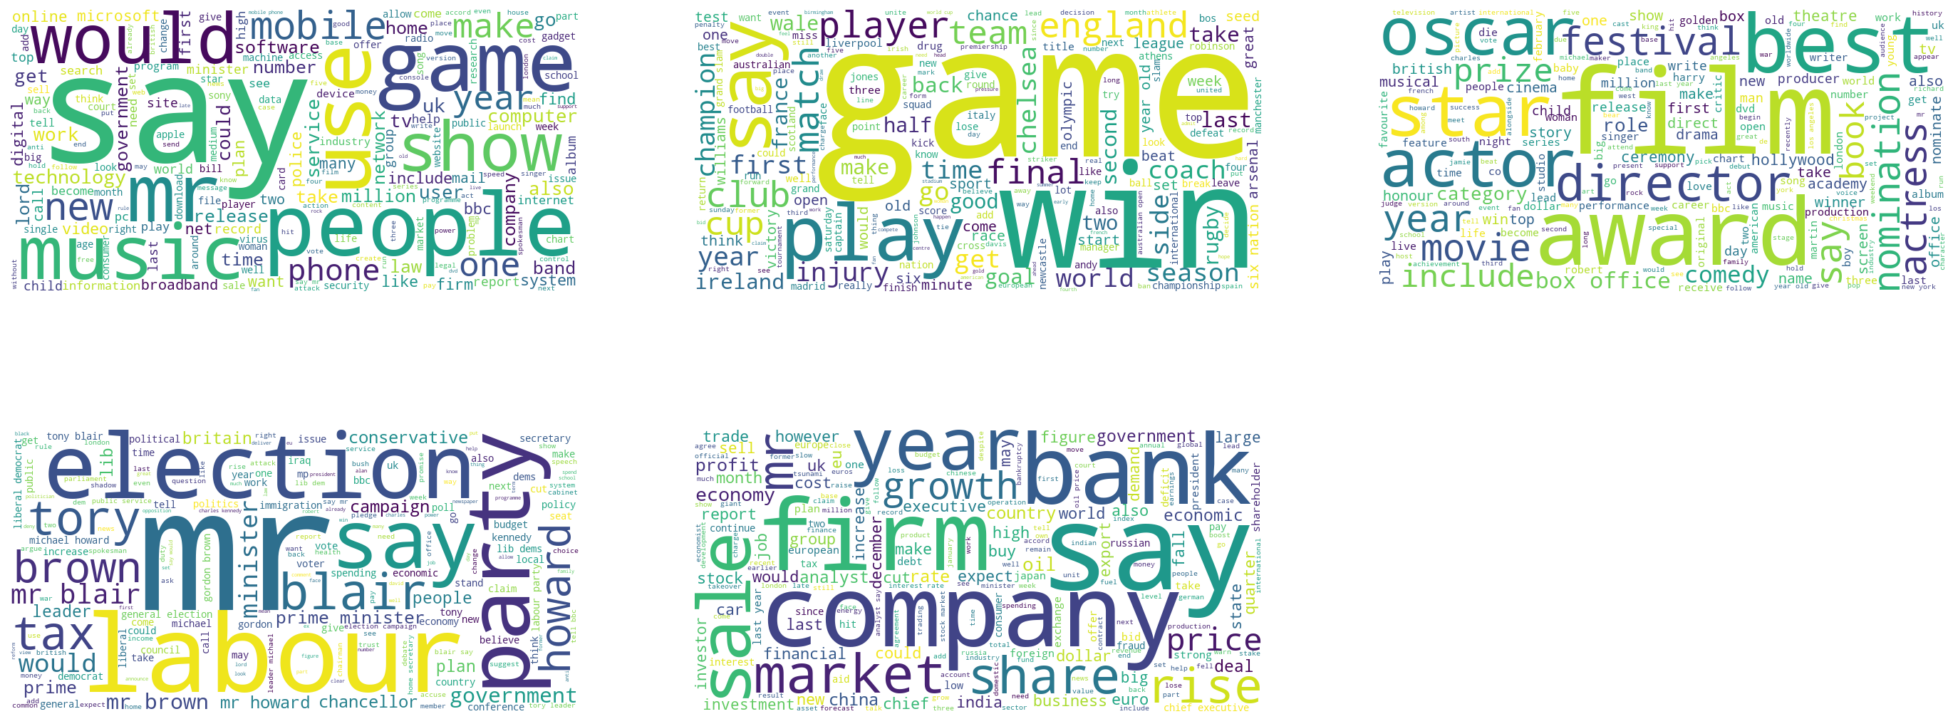

In [84]:
# Plot the word cloud
plt.figure(figsize=(25, 10))
plt.subplot(231)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.subplot(232)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.subplot(233)
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.subplot(234)
plt.imshow(wordcloud_3, interpolation='bilinear')
plt.axis('off')
plt.subplot(235)
plt.imshow(wordcloud_4, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Nhận xét:
....

### Gaussian Mixture Model

In [60]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [61]:
# Define a function to estimate the sihouette score for each k
def gmm_test(dataframe, k):
    from sklearn.mixture import GaussianMixture
    from sklearn import metrics
    from sklearn.metrics import silhouette_score

    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(dataframe)

    return (silhouette_score(dataframe, gmm.predict(dataframe)), gmm)

In [62]:
start_time = datetime.now()
a_pool = mp.Pool(processes=MAX_K - MIN_K + 1)
results = a_pool.starmap(gmm_test, zip(repeat(df_new), K))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
a_pool.close()

KeyboardInterrupt: 

In [ ]:
gmm_clustering_silhouettes = {}
gmm_clustering_models = {}
i = 2
for ret in results:
    gmm_clustering_silhouettes[i] = ret[0]
    gmm_clustering_models[i] = ret[1]
    i = i + 1

Text(0, 0.5, 'Silhouette score')

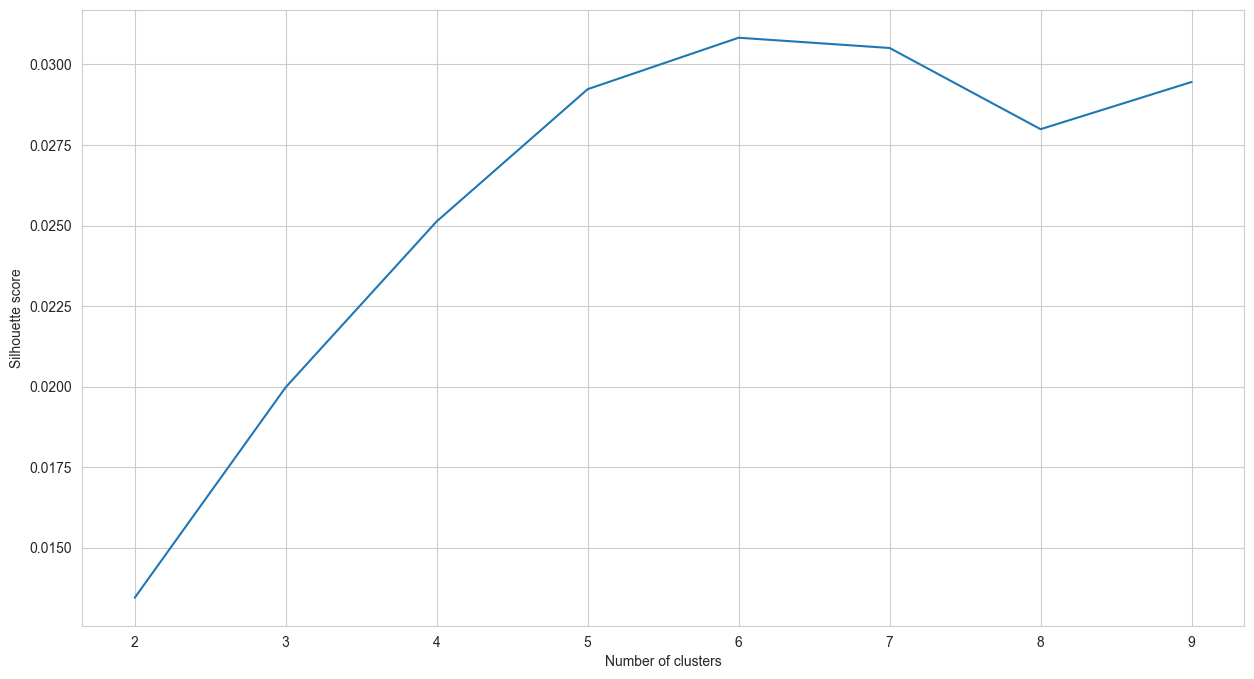

In [ ]:
# Plot silhouette_scores
plt.figure(figsize=(15, 8))
plt.plot(K, gmm_clustering_silhouettes.values())
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

For n_clusters = 2 The average silhouette_score is : 0.013445431160740264
For n_clusters = 3 The average silhouette_score is : 0.019979622224925872
For n_clusters = 4 The average silhouette_score is : 0.02512815921976
For n_clusters = 5 The average silhouette_score is : 0.029232773977349934
For n_clusters = 6 The average silhouette_score is : 0.030830400042052102
For n_clusters = 7 The average silhouette_score is : 0.030511771319354432
For n_clusters = 8 The average silhouette_score is : 0.027990930142667677
For n_clusters = 9 The average silhouette_score is : 0.02945613602294363


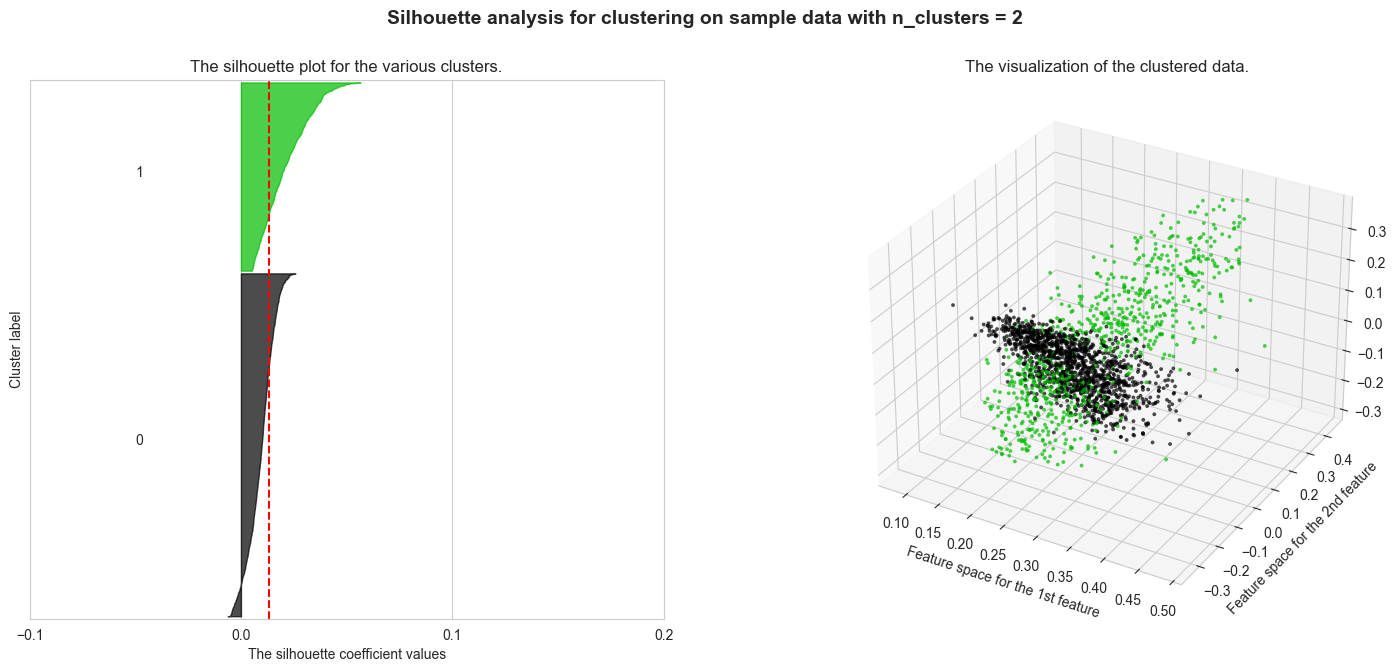

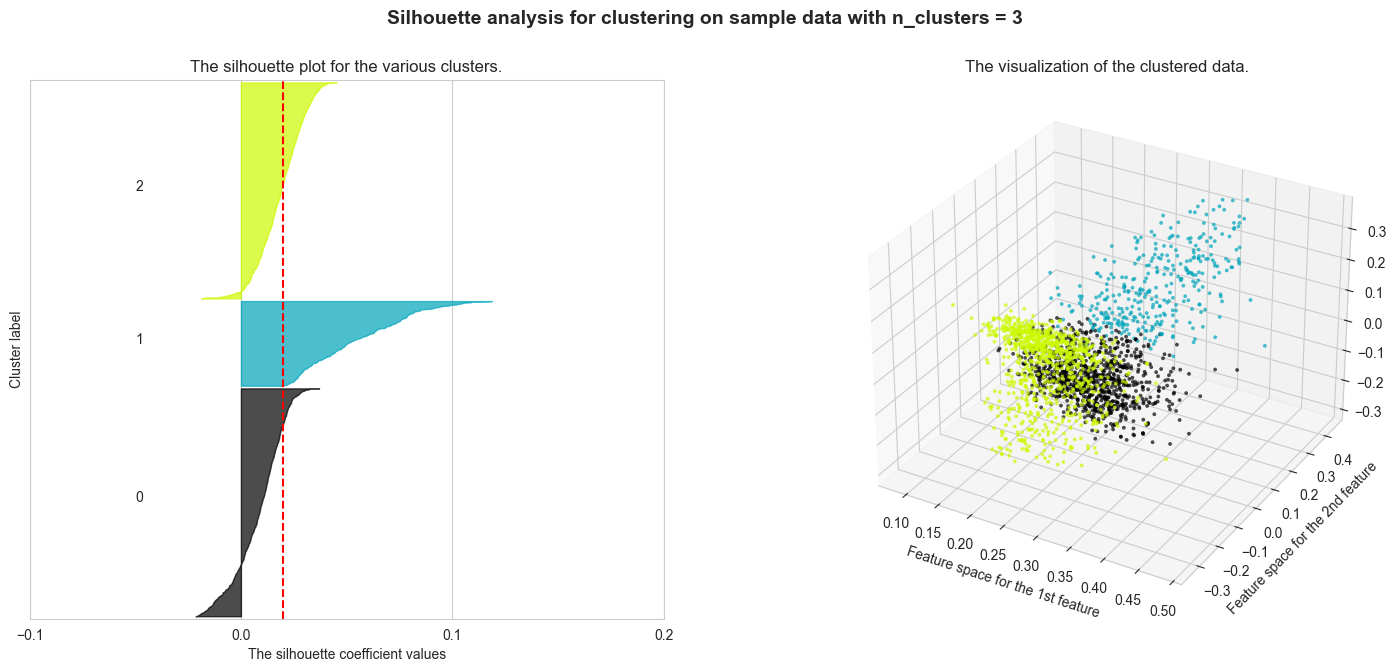

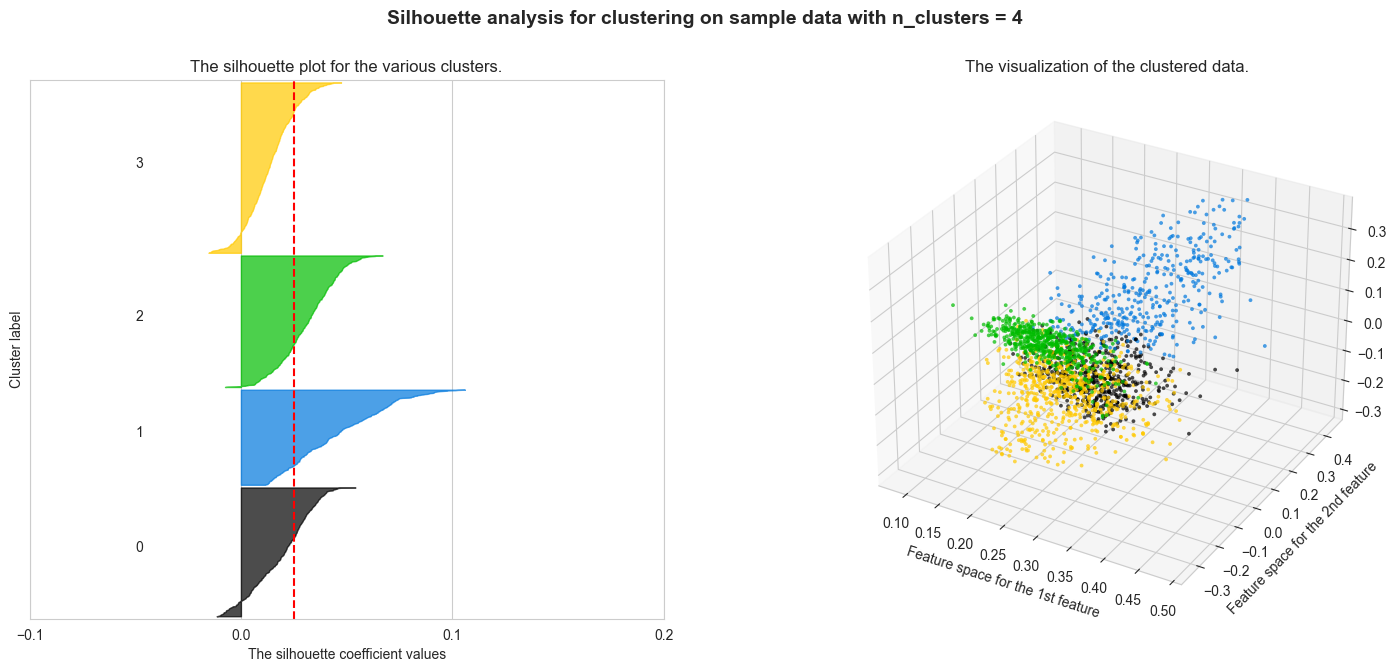

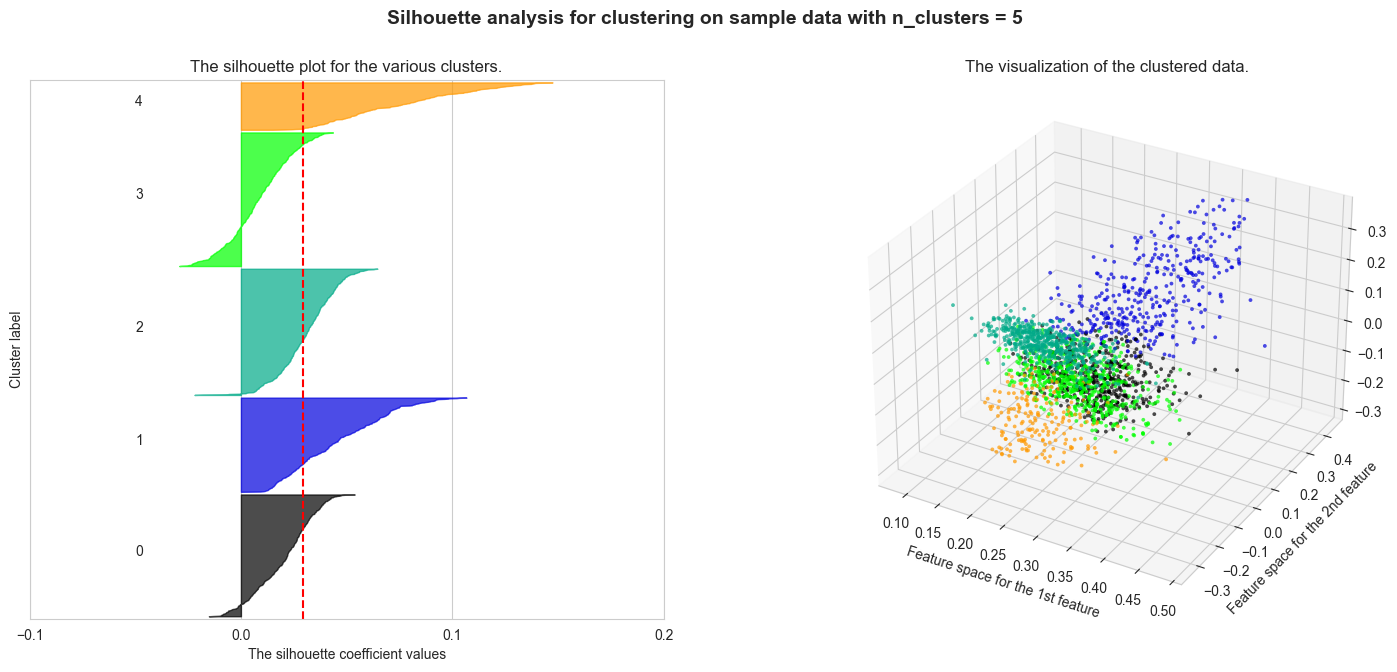

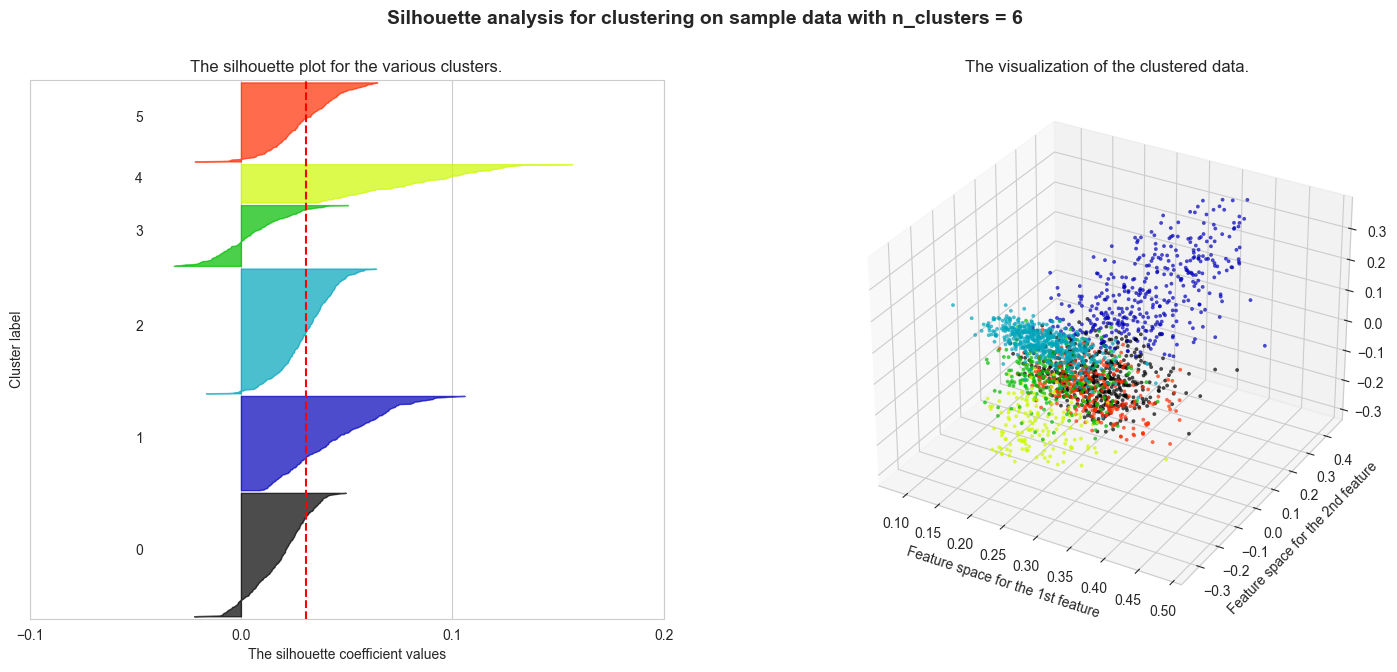

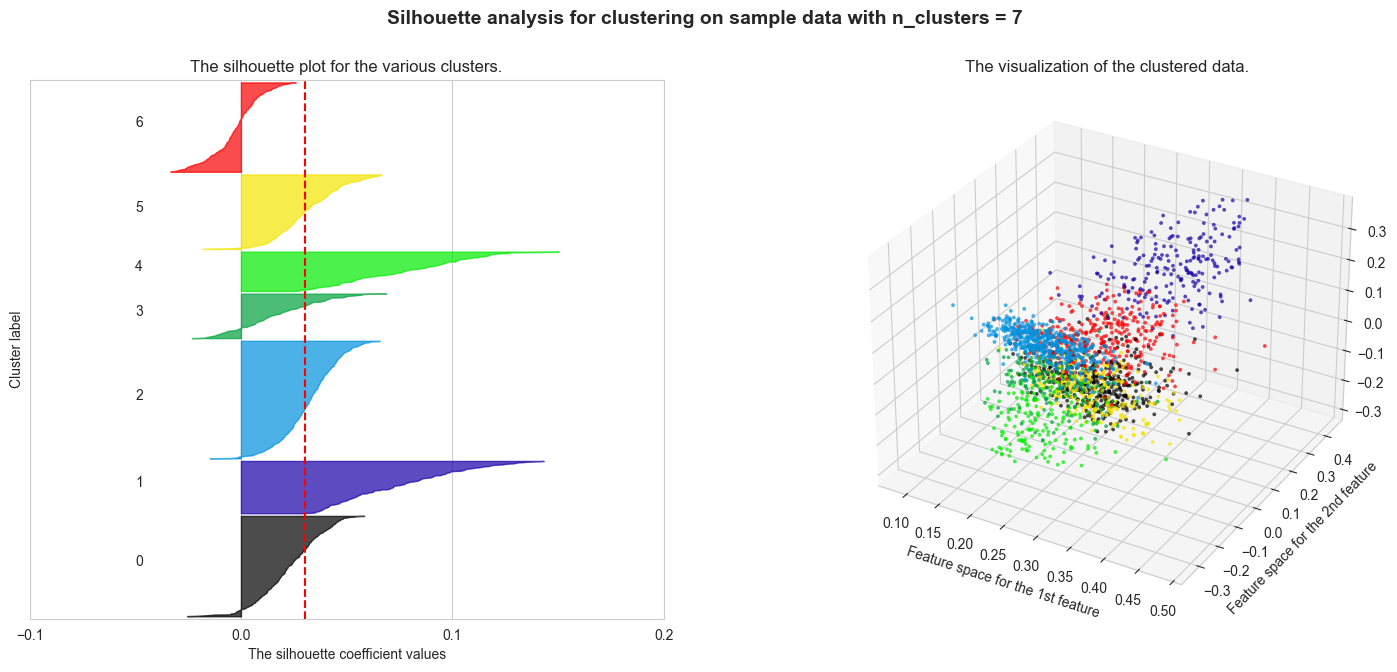

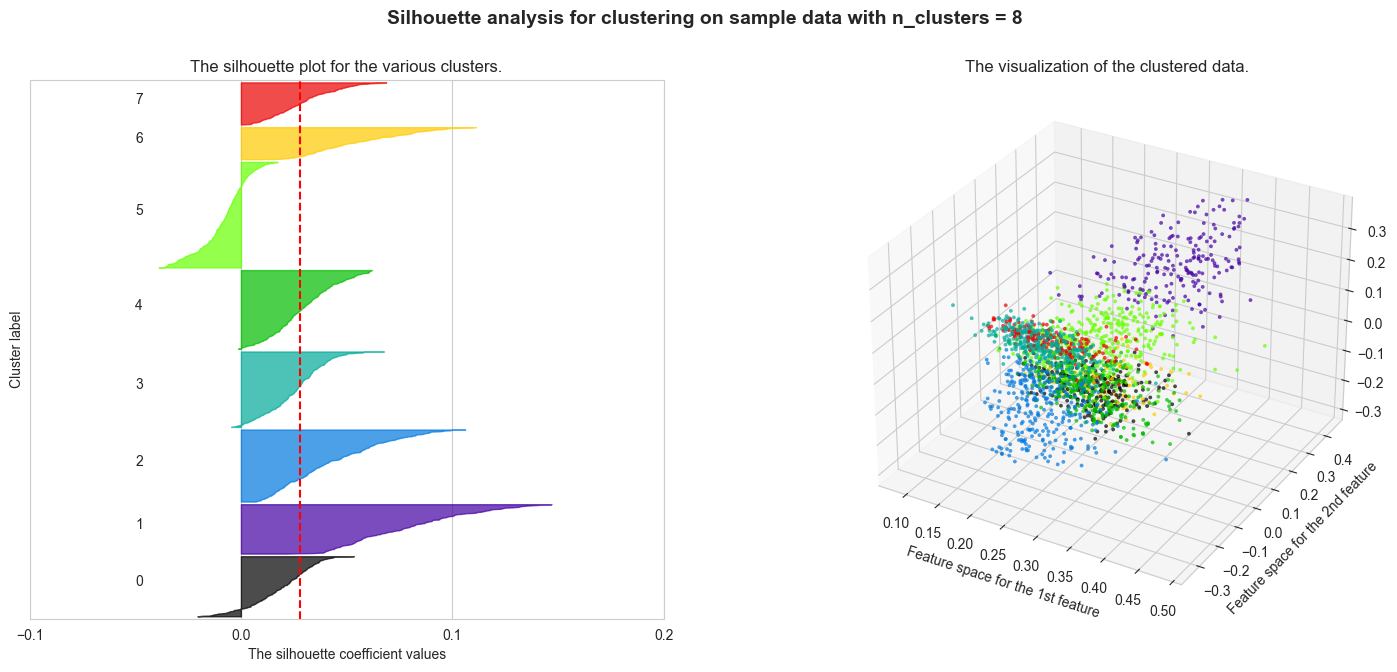

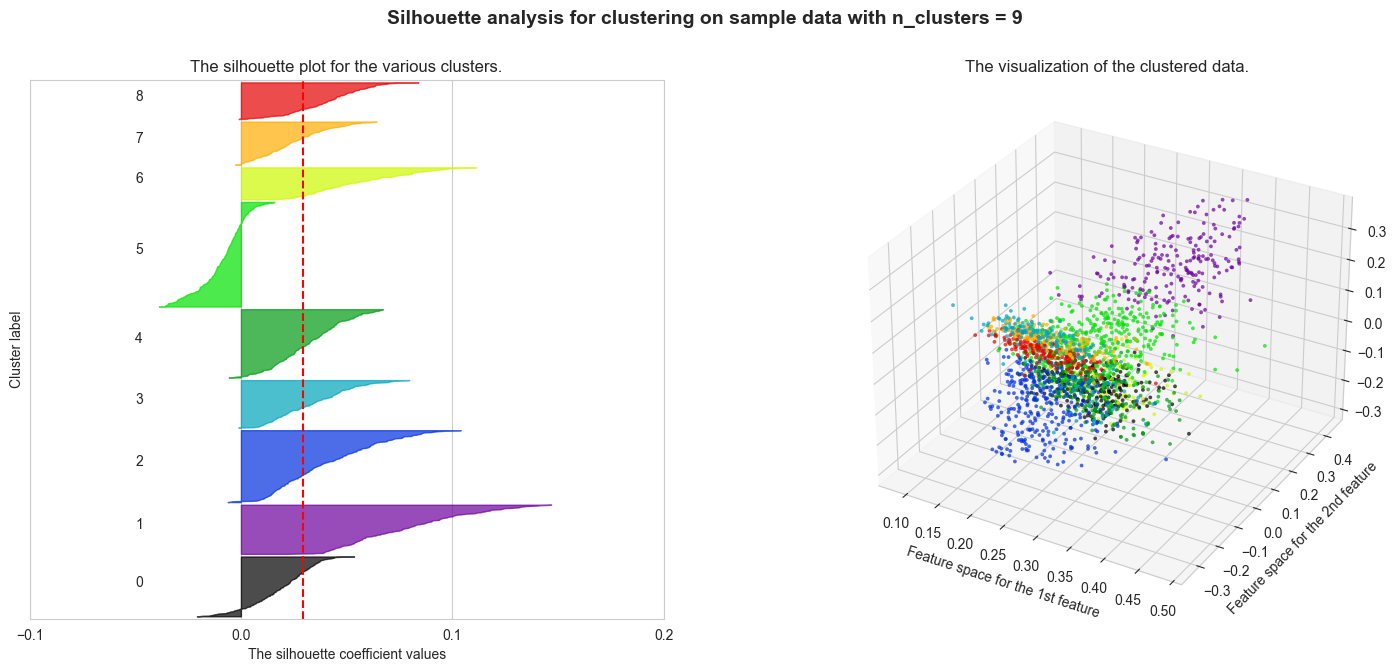

In [ ]:
silhouette_plot.silhouette_plot(MAX_K, df_new, gmm_clustering_models, gmm_clustering_silhouettes)

In [91]:
# Use GaussianMixture with n_clusters=5
cluster = GaussianMixture(n_components=5)

In [92]:
labels = cluster.fit_predict(df_new)

In [93]:
df_gmm = df_new.copy()
df_gmm['cluster_'] = labels

In [94]:
df_gmm.head(20)

ability   able  absolutely  abuse  academy  accept  access  accord  \
0    0.0838 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
1    0.0449 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0316   
2    0.0000 0.0000      0.0000 0.0000   0.0901  0.0000  0.0000  0.0000   
3    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
4    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0674   
5    0.0793 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
6    0.0000 0.0793      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
7    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0474   
8    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
9    0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
10   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
11   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0333   
12   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
13   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
14   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
15   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
16   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
17   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
18   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   
19   0.0000 0.0000      0.0000 0.0000   0.0000  0.0000  0.0000  0.0000   

    account  accuse  ...  writer  wrong   year  year ago  year old  year say  \
0    0.0000  0.0000  ...  0.0000 0.0000 0.0286    0.0000    0.0000    0.0000   
1    0.0000  0.0000  ...  0.0000 0.0000 0.0460    0.0000    0.0000    0.0000   
2    0.0000  0.0000  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
3    0.0000  0.0000  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
4    0.0000  0.0000  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
5    0.0000  0.0000  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
6    0.0000  0.0923  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
7    0.0000  0.0000  ...  0.0000 0.0000 0.1608    0.0000    0.0000    0.0000   
8    0.0000  0.0000  ...  0.0000 0.0000 0.1407    0.0000    0.0000    0.0000   
9    0.0000  0.0000  ...  0.0000 0.0000 0.0622    0.0000    0.0000    0.0000   
10   0.0000  0.0000  ...  0.0000 0.0000 0.0351    0.0000    0.0745    0.0000   
11   0.0000  0.0000  ...  0.0000 0.0000 0.0646    0.0000    0.0000    0.0000   
12   0.0000  0.0000  ...  0.0000 0.0000 0.1066    0.0000    0.0754    0.0000   
13   0.0000  0.0000  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
14   0.0000  0.0000  ...  0.0000 0.0000 0.0658    0.0000    0.0000    0.0000   
15   0.0000  0.0000  ...  0.0000 0.0000 0.0891    0.0787    0.0630    0.0000   
16   0.0000  0.0000  ...  0.0000 0.0000 0.0000    0.0000    0.0000    0.0000   
17   0.0000  0.0000  ...  0.0000 0.0000 0.0776    0.0514    0.0000    0.0000   
18   0.0000  0.0000  ...  0.0000 0.0000 0.0339    0.0000    0.0359    0.0000   
19   0.0000  0.0000  ...  0.0000 0.0000 0.0335    0.0000    0.0000    0.0000   

      yet   york  young  cluster_  
0  0.0000 0.0000 0.0000         3  
1  0.0000 0.0000 0.0000         2  
2  0.0000 0.0000 0.0000         2  
3  0.0000 0.0000 0.0000         2  
4  0.0000 0.0890 0.0000         2  
5  0.0000 0.0000 0.0000         2  
6  0.0000 0.0000 0.0000         3  
7  0.0000 0.0000 0.0000         2  
8  0.0000 0.0959 0.0000         2  
9  0.0000 0.0000 0.1012         2  
10 0.0806 0.0000 0.0000         2  
11 0.0000 0.0000 0.0000         2  
12 0.0816 0.0968 0.0000         2  
13 0.0000 0.0000 0.0000         2  
14 0.0000 0.0000 0.0000         2  
15 0.0000 0.0000 0.0000         3  
16 0.0561 0.0000 0.0000         2  
17 0.0000 0.0000 0.0000         2  
18 0.0389 0.0000 0.1241         2  
19 0.0000 0.0000 0.0000         2  

[20 rows x 

In [95]:
# Create a list of words for each cluster
cluster_0 = df_gmm[df_gmm['cluster_'] == 0].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_1 = df_gmm[df_gmm['cluster_'] == 1].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_2 = df_gmm[df_gmm['cluster_'] == 2].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_3 = df_gmm[df_gmm['cluster_'] == 3].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_4 = df_gmm[df_gmm['cluster_'] == 4].drop('cluster_', axis=1).sum().sort_values(ascending=False)

In [96]:
# Create a word cloud for each cluster
wordcloud_0 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_0)
wordcloud_1 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_1)
wordcloud_2 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_2)
wordcloud_3 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_3)
wordcloud_4 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_4)

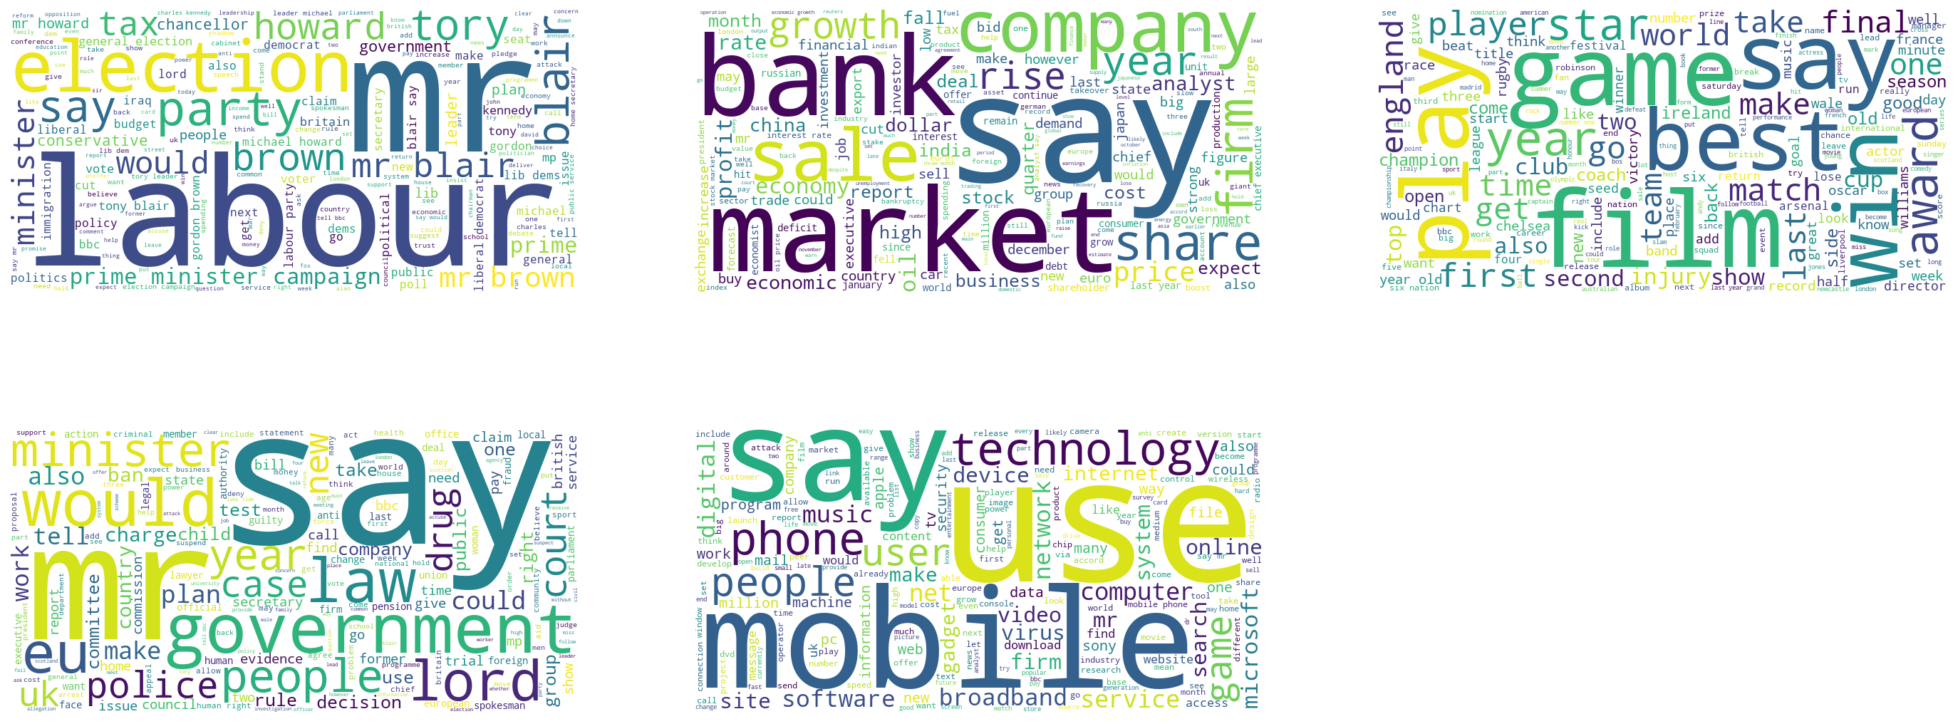

In [97]:
# Plot the word cloud
plt.figure(figsize=(25, 10))
plt.subplot(231)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.subplot(232)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.subplot(233)
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.subplot(234)
plt.imshow(wordcloud_3, interpolation='bilinear')
plt.axis('off')
plt.subplot(235)
plt.imshow(wordcloud_4, interpolation='bilinear')
plt.axis('off')
plt.show()